In [40]:
!pip install scikit-learn


  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.0 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.0 MB 924.3 kB/s eta 0:00:09
   --- ------------------------------------ 0.8/8.0 MB 1.1 MB/s eta 0:00:07
   ----- ---------------------------------- 1.0/8.0 MB 1.2 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.0 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.1/8.0 MB 1.6 MB/s eta 0:00:04
   ------------- -------------------------- 2.6/8.0 MB 1.7 MB/s eta 0:00:04
   --------------- ------------------------ 3.1/8.0 MB 1.8 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.0 MB 2.0 MB/s eta 0:00:03
   ----------------------- ---------------- 4.7/8.0 MB 2.2 MB/s eta 0:00:02
   --------------------------- -------


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('AI_Human.csv')

In [10]:
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


In [12]:
df.describe()

,generated
count,487235.000000
mean,0.372383
std,0.483440
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
df['generated'].value_counts()

generated
0.0    305797
1.0    181438
Name: count, dtype: int64

<Axes: xlabel='generated', ylabel='count'>

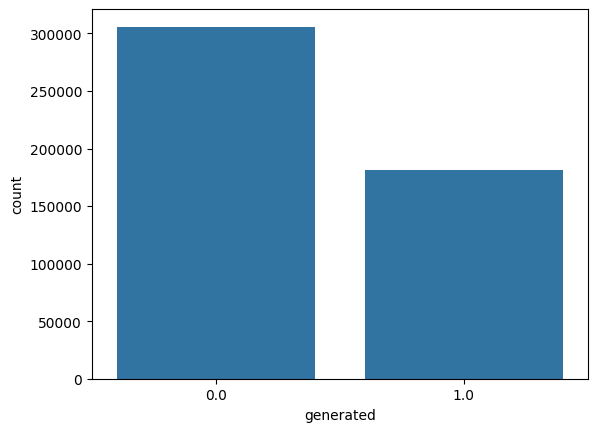

In [14]:
sns.countplot(data = df, x = 'generated')

In [15]:
df['text'][0]

'Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.\n\nIn like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go. Article

In [16]:
df['total'] = df['text'].apply(lambda x : len(x))

In [17]:
df.head()

,text,generated,total
0,Cars. Cars have been around since they became ...,0.0,3289
1,Transportation is a large necessity in most co...,0.0,2738
2,"""America's love affair with it's vehicles seem...",0.0,4428
3,How often do you ride in a car? Do you drive a...,0.0,4013
4,Cars are a wonderful thing. They are perhaps o...,0.0,4698


In [18]:
def remove_tags(text):
    tags = ['\n','\'']
    for tag in tags:
        text = text.replace(tag,'')
    return text

In [19]:
df['text'] = df['text'].apply(remove_tags)

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
def remove_punctuation(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

In [22]:
df['text'] = df['text'].apply(remove_punctuation)

In [23]:
import nltk
from nltk.corpus import words

In [24]:
text = df['text'][704]

In [25]:
def correctly_spelled(word):
    return word in set(words.words())

In [26]:
contractions = {
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how does",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
" u ": " you ",
" ur ": " your ",
" n ": " and ",
"won't": "would not",
'dis': 'this',
'bak': 'back',
'brng': 'bring',
"won't":"would not",
'dis':'this',
"bak":"back",
"brng":'bring'
}

In [27]:
def cont_to_exp(x):
  if type(x) is str:
    for key in contractions:
      value = contractions[key]
      x = x.replace(key, value)
    return x
  else:
    return x

In [28]:
df['text'] = df['text'].apply(lambda x: cont_to_exp(x))

In [31]:
df['text'][0]

'Cars Cars have been around since they became famous in the 1900s when Henry Ford created and built the first ModelT Cars have played a major role in our every day lives since then But now people are starting to question if limiting car usage would be a good thing To me limiting the use of cars might be a good thing to doIn like matter of this article In German Suburb Life Goes On Without Cars by Elizabeth Rosenthal states how automobiles are the linchpin of suburbs where middle class families from either Shanghai or Chicago tend to make their homes Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europeand up to 50 percent in some carintensive areas in the United States Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go Article Paris bans driving due to 

In [30]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS as stopwords

In [32]:
df['text'] = df['text'].apply(lambda x : ' '.join([t for t in x.split() if t not in stopwords]))

In [33]:
len(df['text'][0])

2114

In [34]:
df.head()

,text,generated,total
0,Cars Cars famous 1900s Henry Ford created buil...,0.0,3289
1,Transportation large necessity countries world...,0.0,2738
2,Americas love affair vehicles cooling says Eli...,0.0,4428
3,How ride car Do drive motor vehicle work The s...,0.0,4013
4,Cars wonderful thing They worlds greatest adva...,0.0,4698


In [35]:
X = df['text']
y = df['generated']

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [42]:
tfidf = TfidfVectorizer(norm = 'l1')
X = tfidf.fit_transform(X)

In [43]:
X_train, X_text, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, shuffle=True)

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def run_lr(X_train,y_train,X_test,y_test):
    clf = LogisticRegression(penalty='l2',C = 1.0, tol=0.1)
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    print('Accuracy Score ', accuracy_score(y_test,y_pred))
    print('Classification report ',classification_report(y_test,y_pred))
    
    return tfidf,clf
tfidf_lr,clf_lr = run_lr(X_train,y_train,X_text,y_test)

c:\Users\mansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


Accuracy Score  0.627130645376461
Classification report                precision    recall  f1-score   support

         0.0       0.63      1.00      0.77     61112
         1.0       0.00      0.00      0.00     36335

    accuracy                           0.63     97447
   macro avg       0.31      0.50      0.39     97447
weighted avg       0.39      0.63      0.48     97447



c:\Users\mansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\mansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [45]:
text = ['''Artificial Intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think and act like humans. These machines are designed to mimic cognitive functions such as learning, problem-solving, reasoning, perception, and language understanding.

AI encompasses a broad range of techniques and technologies, including machine learning, deep learning, natural language processing, computer vision, robotics, and more. It aims to create systems that can perform tasks that typically require human intelligence, often faster and more accurately than humans.

AI has applications across various industries and domains, including healthcare, finance, transportation, manufacturing, customer service, and entertainment. Some common examples of AI applications include virtual assistants like Siri and Alexa, recommendation systems like those used by Netflix and Amazon, autonomous vehicles, medical diagnosis systems, and language translation tools.''']
text = tfidf_lr.transform(text)

In [46]:
h_text = ['Large language models are deep neural networks that are trained on a large corpus of text data that uses natural language processing algorithms and are used in storytelling about the data used for text generation. You have used ChatGPT4 once, which is one of the examples of large language models. LLM are trained on millions or billions of text data. Large language models are used to understand and generate the text data. Nowadays, large language is used to analyze the data, or LLMs are used in data analysis. Large language models make it easy to solve problems and give fast and accurate results in comparison to data analysis. In this article, we will see some facts about Large Language Models and Data analysis, and we will see if large language models can replace data analysis.']
h_text = tfidf_lr.transform(h_text)

In [47]:
clf_lr.predict(text)

array([0.])

In [48]:
clf_lr.predict(h_text)

array([0.])

In [49]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
def run_svm(X_train,y_train,X_test,y_test):
    clf = LinearSVC(penalty='l1',C = 1.0, dual=False, loss = 'squared_hinge', tol=0.1)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy Score ', accuracy_score(y_test,y_pred))
    print('Classification report ',classification_report(y_test,y_pred))
    
    return tfidf,clf
tfidf_svm,clf_svm = run_svm(X_train,y_train,X_text,y_test)

Accuracy Score  0.993268135499297
Classification report                precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     61112
         1.0       1.00      0.99      0.99     36335

    accuracy                           0.99     97447
   macro avg       0.99      0.99      0.99     97447
weighted avg       0.99      0.99      0.99     97447



In [50]:
clf_svm.predict(text)

array([1.])

In [51]:
h_text = ['Large language models are deep neural networks that are trained on a large corpus of text data that uses natural language processing algorithms and are used in storytelling about the data used for text generation. You have used ChatGPT4 once, which is one of the examples of large language models. LLM are trained on millions or billions of text data. Large language models are used to understand and generate the text data. Nowadays, large language is used to analyze the data, or LLMs are used in data analysis. Large language models make it easy to solve problems and give fast and accurate results in comparison to data analysis. In this article, we will see some facts about Large Language Models and Data analysis, and we will see if large language models can replace data analysis.']
h_text = tfidf_svm.transform(h_text)

In [52]:
clf_svm.predict(h_text)

array([0.])

In [53]:
import pickle
pickle.dump(clf_svm,open('clf.pkl','wb'))
pickle.dump(tfidf_svm,open('tfidf.pkl','wb'))

In [54]:
svm_clf = pickle.load(open('clf.pkl','rb'))
svm_tfidf = pickle.load(open('tfidf.pkl','rb'))